In [1]:
# Connecting through API Key

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# Download Dataset from kaggle through API (Application Programming Interface)

!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:35<00:00, 39.3MB/s]
100% 1.06G/1.06G [00:35<00:00, 32.4MB/s]


In [3]:
# Extract all folders and files from Zip File

import zipfile
zip_rfe = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_rfe.extractall('/content')
zip_rfe.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',  # take same weight on which VGG16 was trained
    include_top=False,   # Not inclue fully connected layer only use convolutional and pooling layers
    input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 2s 0us/step


**Now VGG 16 model is imported and it's extension is '.h5'**

In [7]:
# Summary of VGG16 model

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

**To see the architecture of fully connected layers use include_top=True parameter while importing pretrained model.**

In [10]:
# Building fully connected layes for VGG16

model = Sequential()

model.add(conv_base) # Take convolutional and pooling layers of VGG16
model.add(Flatten()) # Perform flattening
model.add(Dense(256, activation='relu'))  # First hidden layer with 256 neuron and perfrom 'relu' activation function on it
model.add(Dense(1, activation='sigmoid')) # Hidden layer with 1 neuron and activation function is sigmoid

In [11]:
conv_base.trainable=False

**Do not build VGG16 from strach only customize their fully connected layers.**

In [12]:
# Summary of newly build fully-connected layer

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
# Creating datset of new add

# Training dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels='inferred', # Automatically infer class labels from subdirectory names
    label_mode='int',  # Represent class labels as integers
    batch_size=32,
    image_size=(150,150),
)

# Validation dataset
validation_ds =  keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [20]:
# Normalize dataset

def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

# Apply the process function to the training dataset
train_ds = train_ds.map(process)

# Apply the process function to the validation dataset
validation_ds = validation_ds.map(process)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# adding new information and train fully-connected layers

history = model.fit(train_ds, epochs=5, validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 69s 89ms/step - loss: 0.2690 - accuracy: 0.8852 - val_loss: 0.2386 - val_accuracy: 0.8942
Epoch 2/5
625/625 [==============================] - 54s 86ms/step - loss: 0.1915 - accuracy: 0.9204 - val_loss: 0.3143 - val_accuracy: 0.8534
Epoch 3/5
625/625 [==============================] - 54s 87ms/step - loss: 0.1551 - accuracy: 0.9366 - val_loss: 0.2071 - val_accuracy: 0.9104
Epoch 4/5
625/625 [==============================] - 65s 103ms/step - loss: 0.1295 - accuracy: 0.9464 - val_loss: 0.2064 - val_accuracy: 0.9172
Epoch 5/5
625/625 [==============================] - 56s 89ms/step - loss: 0.1045 - accuracy: 0.9587 - val_loss: 0.2295 - val_accuracy: 0.9076


**Model uses the same architecture of VGG16 in convolutional and pooling layers and uses given architecture of fully-connected layer and only train the parameters of fully-connected layers.**

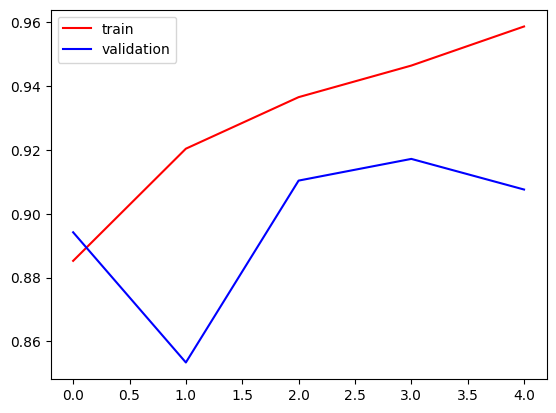

In [23]:
# Plotting graph of training and validation accuracy

import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color='red', label='train')
plt.plot(history.history["val_accuracy"], color='blue', label='validation')
plt.legend()
plt.show()

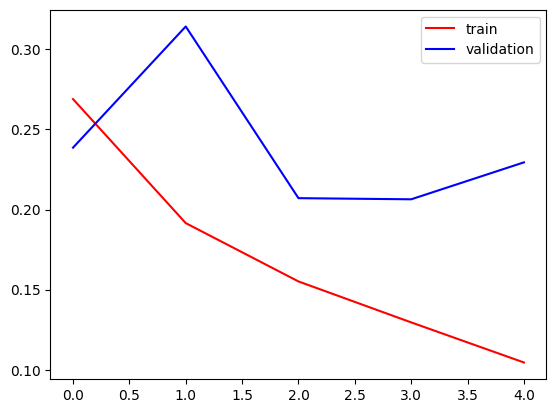

In [24]:
# Plotting graph of training and validation loss

plt.plot(history.history["loss"], color='red', label='train')
plt.plot(history.history["val_loss"], color='blue', label='validation')
plt.legend()
plt.show()